Adagrad Theta: [[3.08910875]
 [3.73626968]]


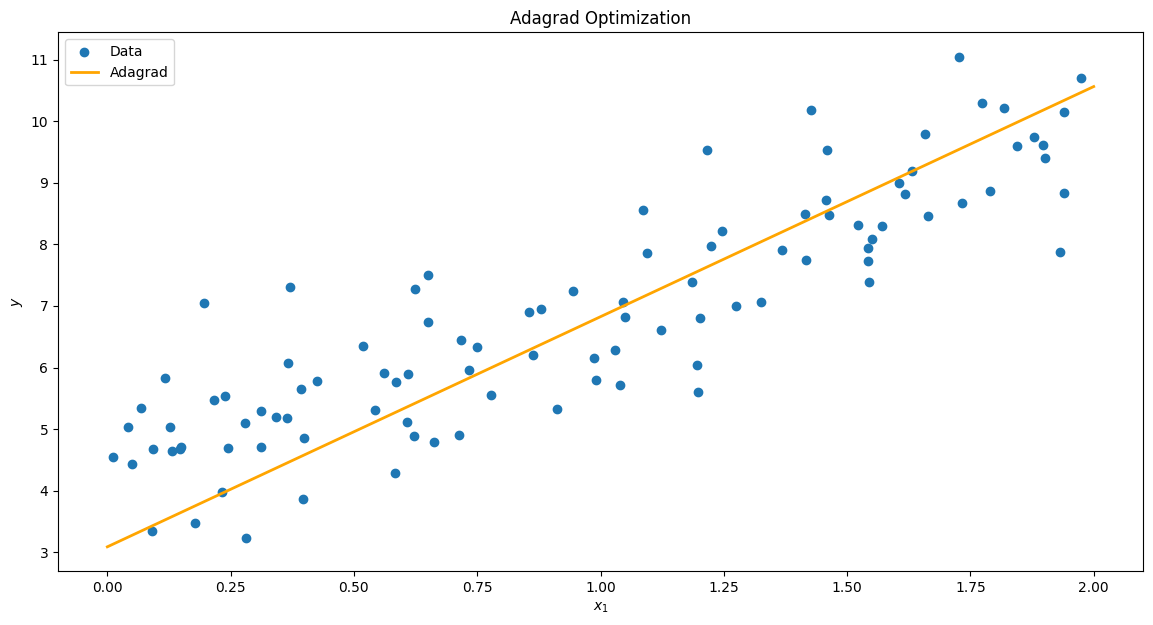

In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X=2* np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
# Adagrad
def adagrad_optimization(X_input, y_input, learning_rate=0.1, num_iterations=1000):
    m = len(y_input)
    theta = np.random.randn(X_input.shape[1], 1)
    epsilon = 1e-8
    gradient_accum = np.zeros_like(theta)

    for iteration in range(num_iterations):
        gradients = 2/m * X_input.T.dot(X_input.dot(theta) - y_input)
        gradient_accum += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
        theta -= learning_rate * adjusted_gradients
    return theta

theta_adagrad = adagrad_optimization(X_b, y)
print("Adagrad Theta:", theta_adagrad)

plt.figure()
plt.scatter(X, y, label="Data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict_adagrad = X_new_b.dot(theta_adagrad)
plt.plot(X_new, y_predict_adagrad, "orange", linewidth=2, label="Adagrad")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.title("Adagrad Optimization")
plt.show()